<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter7/Chapter7_5_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 단순 선형 회귀분석
kc_house_data 데이터의 sqft_living(주거공간의 평방 피트)을 독립변수, price를 종속변수로 설정하여 단순 선형 회귀분석을 실시한 후, 추정된 회귀 모형에 대해 해석하자.

In [1]:
import pandas as pd
import numpy as np
house = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/kc_house_data.csv')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,standard,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,standard,0,3,8,2310,0,2014,0,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,standard,0,3,7,1020,0,2009,0,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,standard,0,3,8,1600,0,2004,0,1410,1287


In [2]:
house = house[['price','sqft_living']]

In [3]:
# 독립변수와 종속변수의 선형 가정
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


독립변수와 종속변수의 상관관계가 약 0.7로 양의 상관성이 있음을 확인하였다.  
회귀계수와 상관계수가 어떠한 차이가 있는지 알아보자.

In [4]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

X = house['sqft_living']
y = house['price']

formula = "price ~ sqft_living"
lr = ols(formula, data = house).fit()
y_pred = lr.predict(X)

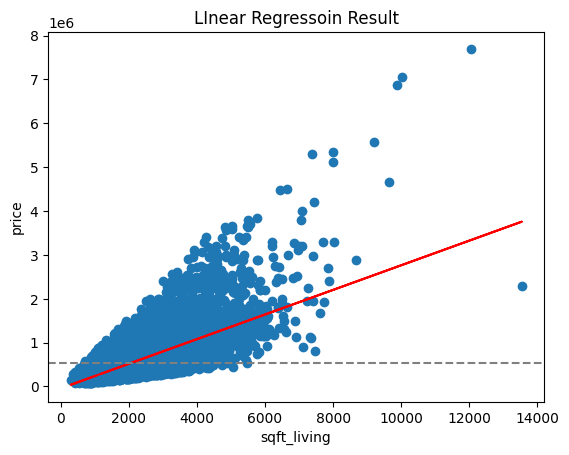

In [5]:
# 시각화
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price', fontsize = 10)
plt.axhline(y=y.mean(), color = 'grey', linestyle = '--')
plt.title('LInear Regressoin Result')
plt.show()

In [6]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:23:54   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q1. 모형이 데이터를 잘 적합하고 있는가?  
A1 : 직관적으로 직선이 모든 데이터를 잘 설명하지는 못하고 있는 것으로 보인다. 오차 또한 (0,0)에서 멀어질수록 분산이 커지는 특정한 패턴을 이루고 있으므로 단순 회귀분석으로는 데이터를 충분히 설명할 수 없는 것을 보인다.(등분산성 만족 못함)  

Q2. 회귀 모형이 통계적으로 유의한가?  
A2 : F-통계량과 p-value를 확인한다.  
p-value가 0 이므로, 귀무가설이 기각되고, 회귀 모형은 유의하다고 볼 수 있다.  

Q3. 모형은 데이터를 얼마나 설명할 수 있는가?  
A3 : R^2값을 확인한다. 0.493이므로, 전체 데이터의 49.3%를 설명한다고 할 수 있다. 이는 그닥 좋은 성능은 아님을 알 수 있다.  
통게 모델이 유의하다고 하여, 모델의 성능이 좋은 것은 아니다.  
하지만 R^2가 0.493이라고 해서 모델을 사용하지 못하는 것 또한 아니다. 산업에 따라 예측의 정확도가 49%인 것이 엄청난 모델일 수 있다.

Q4. 모형 내의 회귀계수는 유의한가?
A4 : intercept는 모형의 상수 값이므로 관심사가 아니다.  
변수인 sqft_living의 경우 p-value가 0.000으로 0.05보다 작으므로 유의한 변수로 볼 수 있다.

결론적으로 1~4의 모델 검토를 통해 전체 데이터의 49.3%의 설명력을 갖는 회귀식을 구할 수 있다.
(만일  회귀 모델과 계수가 유의하지 않다면 이와 같은 회귀식을 구하는 것은 의미가 없다.)


In [7]:
regression_formula = ('').join(["'Price' = sqft_living*",str(round(lr.params['sqft_living'],4)),"+", str(lr.params['Intercept'])])
regression_formula

"'Price' = sqft_living*280.6236+-43580.743094474325"

# 6. 다중 선형 회귀분석
파이썬을 활용하여 다중 선형 회귀분석에서 다중공선성을 제거하고 최적의 모델을 찾기 위해 변수선택법을 진행해보자.

In [8]:
import pandas as pd
Cars = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Cars93.csv')
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [9]:
Cars

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,Front,...,7,187,115,72,38,34.0,-2147483648,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,Front,...,5,180,103,67,35,31.5,14,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,Front,...,4,159,97,66,36,26.0,15,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14,2985,non-USA,Volvo 240


종속변수를 Price로 놓고 독립변수를 EngineSize, RPM, Weight, Length, MPG.city, MPG.highway를 놓고 가격에 영향을 주는 변수를 찾기 위한 회귀분석을 진행해보자.

In [10]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ols모델의 formula를 정의할 때, 일부 특수문자는 쓸 수 없기에, 컬럼 특수문자 제거
Cars.columns = Cars.columns.str.replace(".","")
formula = "Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway"
model = smf.ols(formula, data = Cars)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           4.88e-14
Time:                        13:23:58   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

모델은 유의하나, 모델의 Adj.R^2은 0.542로 낮은 수치를 나타냄.  
6개의 변수를 모두 사용하였을 때, price데이터의 54.2%만을 설명할 수 있다는 의미임.  
이를 개선하기 위해 다중공선성 제거와 변수선택법으로 모델의 성능을 높여보자.

In [11]:
# 우선 아래와 같이 다중공선성을 파악하기 위해 간단하게 상관관계를 살펴볼 수 있다.
features = ['EngineSize','RPM','Weight','Length','MPGcity','MPGhighway']
Cars[features].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


MPGCity와 MPGhighway는 0.9 이상의 상관성을 보이므로 다중공선성이 존재함을 알 수 있다.
하지만 상관계수로 다중공선성 변수를 제거하기에는 둘 중 어떠한 변수를 제거할지가 애매하다.  

아래의 코드를 통해 VIF 값을 구해보자

In [12]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
y,X = dmatrices(formula, data = Cars, return_type = 'dataframe')

vif_list = []
for i in range(1, len(X.columns)):
  vif_list.append([variance_inflation_factor(X.values,i), X.columns[i]])
pd.DataFrame(vif_list, columns = ['vif','variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


VIF값을 통해 다중공선성을 확인한 결과 MPGcity의 변수를 제거해야 함을 알 수 있다.  
MPGcity의 변수를 제거하고 다시 다중 선형 회귀분석을 진행해보자

In [13]:
formula2 = "Price ~ EngineSize + RPM + Weight + MPGhighway"
model = smf.ols(formula2, data = Cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.26e-15
Time:                        13:23:58   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

앞서 분석했던 모델과 Adj.R^2, AIC의 큰 변화는 없는 것을 알 수 있다.  
다중공선성의 제거는 모델의 성능향상보다는 무분별한 변수 선택으로 데이터의 관리가 어려워지는 현상을 막는 것에 의의가 있다.  
또한 MPGcity를 제거했을 때, MPGhighway의 p-value값이 현저히 낮아진 것을 볼 수 있다.  
이처럼 유의한 변수임에도 다중공선성이 존재하는 경우 유의하지 않은 변수처럼 여겨질 수 있으므로 다중공선성은 꼭 해결해야 할 과제이다.  



## 변수선택법
그렇다면 이제는 독립변수 중 유의한 변수를 고르고, 모델의 성능을 최적화시키는 변수선택법을 진행해보자.  

In [20]:
import time
import itertools

def processSubset(X, y, feature_set):
  model = sm.OLS(y, X[list(feature_set)])
  regr = model.fit()
  AIC = regr.aic
  return {"model":regr, "AIC" : AIC}

# 전진선택법
def forward(X, y, predictors):
  # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
  remainig_predictors = [p for p in X.columns.difference(['Intecept']) if p not in predictors]
  results = []
  for p in remainig_predictors:
    results.append(processSubset(X=X, y = y, feature_set = predictors + [p] + ['Intercept']))

  #데이터프레임으로 변환
  models = pd.DataFrame(results)

  #AIC가 가장 낮은 것을 선택
  best_model = models.loc[models['AIC'].argmin()]
  print("Processed ", models.shape[0], "models on ", len(predictors)+1, "predictors in ")
  print("Selected predictors : ", best_model['model'].model.exog_names, "AIC : ",best_model[0])
  return best_model

# 후진소거법
def backward(X, y, predictors):
  tic = time.time()
  results = []

  for combo in itertools.combinations(predictors, len(predictors)-1):
    results.append(processSubset(X=X,y=y, feature_set = list(combo) + ['Intercept']))
  models = pd.DataFrame(results)

  # 가장 낮은 AIC를 가진 모델을 선택
  best_model = models.loc[models['AIC'].argmin()]
  toc = time.time()

  print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic))
  print("Selected predictors: ", best_model['model'].model.exog_names, 'AIC: ', best_model[0])

  return best_model

#단계적 선택법
def Stepwise_model(X,y):
  Stepmodels = pd.DataFrame(columns = ['AIC','model'])
  tic = time.time()

  predictors = []
  Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

  for i in range(1, len(X.columns.difference(['Intercept']))+1):
    Forward_result = forward(X=X, y=y,predictors=predictors)
    print("forward")
    Stepmodels.loc[i] = Forward_result
    predictors = Stepmodels.loc[i]['model'].model.exog_names
    predictors = [k for k in predictors if k != 'Intercept']
    Backward_result = backward(X=X, y=y, predictors = predictors)

    if Backward_result['AIC'] < Forward_result['AIC']:
      Stepmodels.loc[i] = Backward_result
      predictors = Stepmodels.loc[i]['model'].model.exog_names
      Smodel_before = Stepmodels.loc[i]['AIC']
      predictors = [k for k in predictors if k != 'Intercept']
      print('backward')

    if Stepmodels.loc[i]['AIC'] > Smodel_before:
      break
    else :
      Smodel_before = Stepmodels.loc[i]['AIC']
  toc = time.time()
  print("Total elapsed time:", (toc - tic), "seconds.")
  return (Stepmodels['model'][len(Stepmodels['model'])])


In [21]:
Stepwise_best_model = Stepwise_model(X=X,y=y)

Processed  7 models on  1 predictors in 
Selected predictors :  ['Weight', 'Intercept'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7e333c4888b0>
forward
Processed  1 models on 0 predictors in 0.0027687549591064453
Selected predictors:  ['Intercept'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7e333c5ba2c0>
Processed  6 models on  2 predictors in 
Selected predictors :  ['Weight', 'RPM', 'Intercept'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7e333c489f60>
forward
Processed  2 models on 1 predictors in 0.004611492156982422
Selected predictors:  ['Weight', 'Intercept'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7e333c733730>
Processed  5 models on  3 predictors in 
Selected predictors :  ['Weight', 'RPM', 'EngineSize', 'Intercept'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7e333c5b8b20>
forward
Processe

<ipython-input-20-7ac82a57fe0e>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Selected predictors : ", best_model['model'].model.exog_names, "AIC : ",best_model[0])
<ipython-input-20-7ac82a57fe0e>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Selected predictors: ", best_model['model'].model.exog_names, 'AIC: ', best_model[0])
<ipython-input-20-7ac82a57fe0e>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pri

In [22]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           6.75e-16
Time:                        13:36:18   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -25.8966      4.553     -5.688      0.000     -34.944     -16.850
Intercept    -25.8966      4.553     -5.688      0.000     -34.944     -16.850
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     3.20e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.42e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

단계적 선택법을 통해 최종적으로 Weight, RPM, EngineSize가 포함된 다중 선형 회귀 모델을 채택하였다. 이 모델은 Adj.R^2값이 0.547로 모델이 전체 데이터의 54.7%를 설명할 수 있다. 설명력이 높은 모델은 아니므로 추가적인 변수를 찾아 데이터를 보완해야 할 필요성이 있다.  

In [30]:
Stepwise_best_model.params['Intercept'].sum()

-51.793291505446035

In [34]:
regression_formula = ('').join(["Price = Weight*",str(round(Stepwise_best_model.params['Weight'],4))," + ", "RPM*", str(round(Stepwise_best_model.params['RPM'],4)),
                                " + ", "EngineSize*", str(round(Stepwise_best_model.params['EngineSize'],4)), " + ", str(round(Stepwise_best_model.params['Intercept'].sum(),4))])
regression_formula

'Price = Weight*0.0073 + RPM*0.0071 + EngineSize*4.3054 + -51.7933'

회귀계수 설명  
모델 자체의 성능이 좋지 않으므로 회귀계수의 값이 정확하다고 말할 수 없지만 회귀식에서 차량의 가격에 가장 큰 영향을 주는 변수는 EngineSize라고 할 수 있다.  
차량의 가격은 EngineSize에 따라 바뀐다고 해도 될 만큼 다른 변수에 비해 회귀계수가 월등히 높다.  
반명 Weight, RPM은 유의한 변수이지만, 회귀계수는 너무 작아 거의 영향력이 없다고 할 수 있다.